In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%pip install -U kaleido
plt.rcParams['figure.figsize'] = (15, 10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pathSmic='/content/drive/MyDrive/Colab Notebooks/OpenData/Hakan/evolutiondusmic/valeurs_annuelles.csv'

In [3]:
pathConso='/content/drive/MyDrive/Colab Notebooks/OpenData/Hakan/indicedesprixalaconsomation/valeurs_mensuelles.csv'

Supprime les 3 premières lignes des data

In [4]:
df_evolutionSmic = pd.read_csv(pathSmic, sep=';',skiprows=3)

In [5]:
df_consomation = pd.read_csv(pathConso, sep=';',skiprows=3)

Renomage des entêtes

In [6]:
df_evolutionSmic.rename(columns={"Période":"periode","Unnamed: 1": "indice_smic", "Unnamed: 2": "codes"}, inplace=True)

In [7]:
df_consomation.rename(columns={"Période":"periode","Unnamed: 1": "indice_prix_consomation", "Unnamed: 2": "codes"}, inplace=True)

Converstion des dates en Datetime

In [8]:
df_consomation['periode'] = pd.to_datetime(df_consomation['periode'])

Converstion des dates en année

In [9]:
df_consomation['periode'] = df_consomation['periode'].dt.strftime('%Y')

Faire la moyenne pour chaque année

In [10]:
df_consomation_average = df_consomation.groupby(['periode']).mean()
df_consomation_average.reset_index(inplace=True)

Fonctions pour transformer les valeur en pourcentage en fonction de l'année de référence.

In [11]:
def percentageSmic(x):
  return ((x-147.5) / 147.5)*100

In [12]:
def percentageAverage(x):
  return ((x-98.8) / 98.8)*100

Appliquer les fonctions sur les indices des deux dataframes

In [13]:
SmicBar = sorted(df_evolutionSmic['indice_smic'].apply(percentageSmic))

In [14]:
ConsoBar = df_consomation_average['indice_prix_consomation'].apply(percentageAverage)

Période de référence

In [15]:
periode = df_consomation_average['periode']

In [16]:
# plt.bar(periode, df_consomation_average['indice_prix_consomation'])
# plt.ylim((95,110))
# plt.savefig('indice_consomation.png')
# plt.title("Indice consomation")
# plt.show()

In [17]:
# plt.bar(periode, ConsoBar)
# plt.ylim((0,12))
# plt.title("Pourcentage consomation base 2012")
# plt.savefig('pourcentage_consomation.png')
# plt.show()

Graph des deux dataframe en un pour visualiser les données et évolution

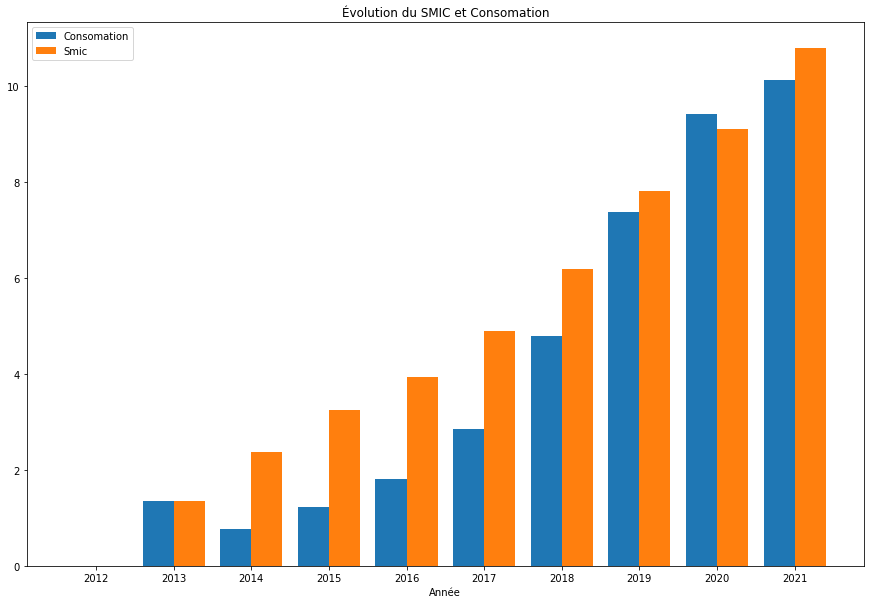

In [18]:
X_axis = np.arange(len(periode))
plt.bar(X_axis - 0.2, ConsoBar, 0.4, label = 'Consomation')
plt.bar(X_axis + 0.2, SmicBar, 0.4, label = 'Smic')
plt.xticks(X_axis, periode)
plt.xlabel("Année")
plt.legend()
plt.title("Évolution du SMIC et Consomation")
plt.savefig('comparaison.png')
plt.show()

Autre jeux de donnée

In [19]:
pathSmicEvolution='/content/drive/MyDrive/Colab Notebooks/OpenData/Hakan/smic.xlsx'

In [20]:
df_Smic = pd.read_excel(pathSmicEvolution)
df_Smic.drop(df_Smic.tail(6).index,inplace=True) 
df_Smic.drop(df_Smic.head(3).index,inplace=True) 

In [21]:
df_Smic.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1,inplace=True) 

In [22]:
df_Smic.rename(columns={"Salaire minimum interprofessionnel de croissance (Smic)":"annee","Unnamed: 3":"smic_horaire","Unnamed: 4": "smic_mensuel"}, inplace=True)

In [23]:
# df_Smic

In [24]:
df_newSmic = df_Smic.loc[df_Smic['annee'] >= 2012]
# df_newSmic.loc[df_newSmic['annee'] >= 2012]

In [25]:
# plt.bar(df_newSmic.loc[df_newSmic['annee'] >= 2012]['annee'], df_newSmic['smic_horaire'])
# plt.ylim((5,12))
# plt.title("Évolution du prix horaire du SMIC")
# plt.savefig('smic_horaire.png')
# plt.show()

Gini

In [26]:
pathGini = '/content/drive/MyDrive/Colab Notebooks/OpenData/Hakan/RPM2021-VE1.xlsx'


In [27]:
df_gini = pd.read_excel(pathGini,sheet_name="Figure 5")


In [28]:
df_gini.drop(df_gini.head(4).index,inplace=True)
df_gini.drop(df_gini.tail(3).index,inplace=True)


In [29]:
df_gini.rename(columns={"5. Inégalités de niveaux de vie avant et après redistribution depuis 1996":"annee","Unnamed: 1":"Indice Gini"}, inplace=True)
df_gini = df_gini.loc[:, ['annee','Indice Gini']]
df_gini = df_gini.loc[df_gini['annee'] >= 1998]

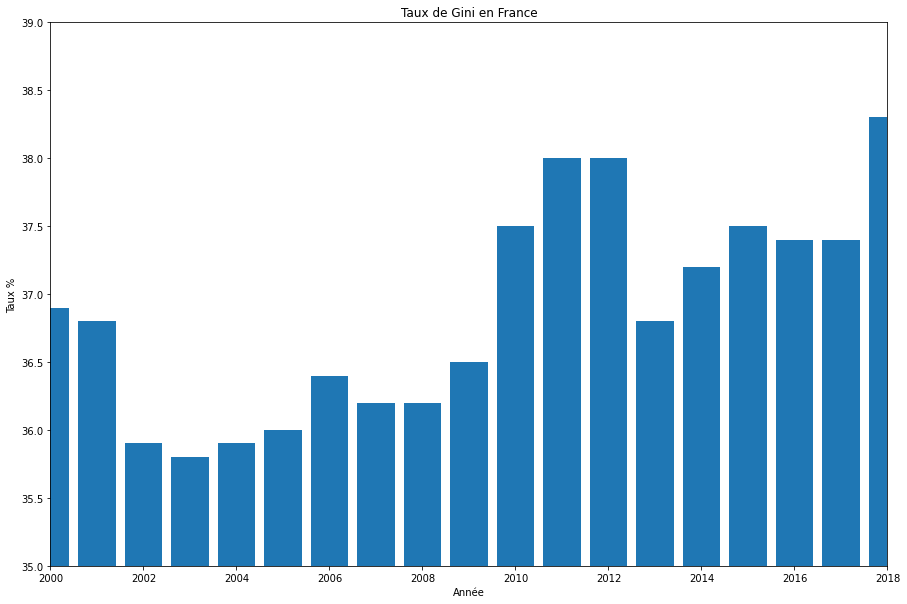

In [30]:
plt.bar(df_gini['annee'],df_gini['Indice Gini']*100)
plt.ylim((35,39))
plt.xlim((2000,2018))
plt.xlabel('Année')
plt.ylabel('Taux %')
plt.title("Taux de Gini en France")
plt.savefig('taux_gini.png')
plt.show()

In [31]:
fig = px.line(df_gini, x="annee", y="Indice Gini", title='Gini')
fig.write_image("figGini.png")
fig.show()

In [32]:
# df_rsa = pd.read_excel(pathGini,sheet_name="Figure A de l'encadré")
# df_rsa.drop(df_rsa.head(2).index,inplace=True)
# df_rsa.drop(df_rsa.tail(4).index,inplace=True)
# df_rsa.rename(columns={"A. Nombre d’allocataires du RSA depuis janvier 2017":"annee","Unnamed: 1":"mois","Unnamed: 2":"effectif"}, inplace=True)
# df_rsa = df_rsa.fillna(value=0)
# df_rsa=df_rsa.reset_index()
# df_rsa
# year=2017
# for idx, i in enumerate(df_rsa['annee']):
#   if i==0:
#     df_rsa['annee'][idx]=year
#   else:
#     year=i

In [33]:
# df_rsa = df_rsa.groupby(['annee']).mean()


In [34]:
# df_rsa=df_rsa.reset_index()
# df_rsa=df_rsa.drop(['index'], axis=1)
# df_rsa
# plt.bar(df_rsa['annee'],df_rsa['effectif'])
# plt.ylim((1800000,2100000))
# plt.show()